<a href="https://colab.research.google.com/github/sohamhmhm/CodeClauseint/blob/main/Fraud_detection_using_Adv_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings ("ignore", message="numpy. ufunc size changed")

In [4]:
dataset = pd.read_csv('/content/creditcard.csv')

Text(0, 0.5, 'Frequency')

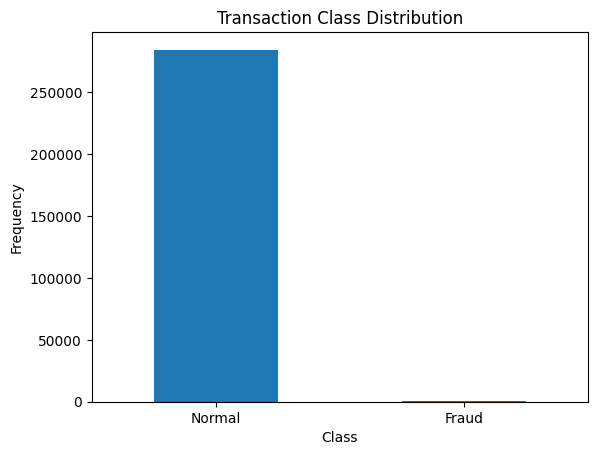

In [5]:
Fraud = dataset[dataset['Class'] == 1]
Normal = dataset[dataset['Class'] == 0]

count_classes = pd.Series(dataset['Class']).value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
X = dataset.iloc[:, [1,29]].values
y = dataset.iloc[:, 30].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Confusion matrix for Normal logistic regression
[[85289     7]
 [  146     1]]
AUC for Normal Logistic Regression: 0.796


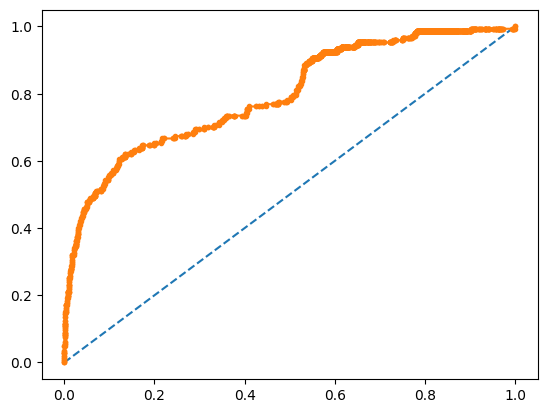

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_prediction)
print ('Confusion matrix for Normal logistic regression')
print (cm1)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc1 = roc_auc_score(y_test, probs)
print('AUC for Normal Logistic Regression: %.3f' % auc1)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt. plot([0,1], [0,1], linestyle= '--')
plt. plot(fpr, tpr, marker='.')
plt. show()

Confusion matrix for NormalKNN
[[85292     4]
 [  145     2]]
AUC for Normal KNN: 0.592


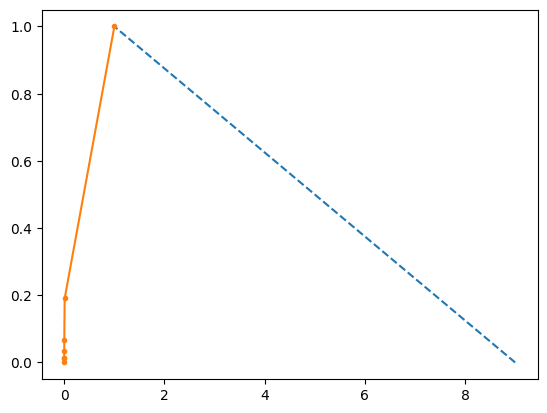

In [12]:
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_prediction2 = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_prediction2)
print ( 'Confusion matrix for NormalKNN')
print (cm2)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc2 = roc_auc_score(y_test, probs)
print('AUC for Normal KNN: %.3f' % auc2)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([9, 1], [0, 1], linestyle='--')
plt. plot(fpr, tpr, marker='.')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Confusion matrix for Normal Randon Forest
[[85258    38]
 [  140     7]]
AUC for Normal Random Forest: 0.616


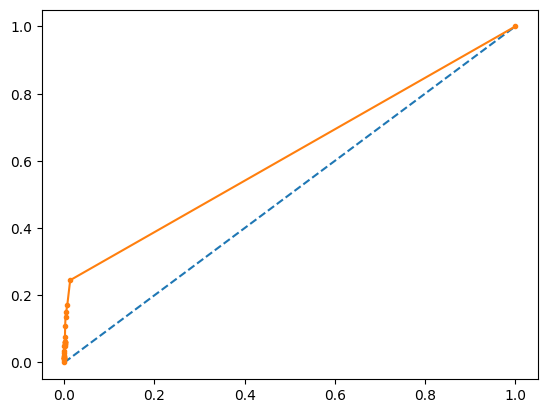

In [14]:
classifier = RandomForestClassifier(n_estimators=25, oob_score=True, random_state=0)
classifier.fit(X_train, y_train)
y_prediction3 = classifier.predict(X_test)
cm3 = confusion_matrix(y_test, y_prediction3)
print('Confusion matrix for Normal Randon Forest')
print (cm3)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc3 = roc_auc_score(y_test, probs)
print('AUC for Normal Random Forest: %.3f' % auc3)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion matrix for Normal XGBoost
[[56861     3]
 [   22    76]]
AUC for Normal XGBoost: 0.981


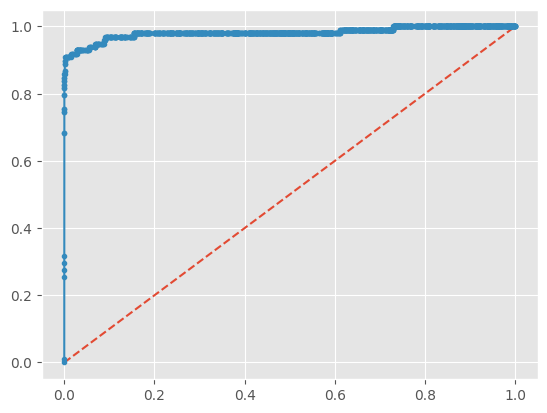

In [73]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_prediction4 = model.predict(X_test)
cm4 = confusion_matrix(y_test, y_prediction4)
print('Confusion matrix for Normal XGBoost')
print (cm4)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc4 = roc_auc_score(y_test, probs)
print('AUC for Normal XGBoost: %.3f' % auc4)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt. plot(fpr, tpr, marker='.')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [21]:
dataset['Amount'] = sc.fit_transform(pd.DataFrame(dataset['Amount']))

In [22]:
dataset['Class'].value_counts()

,count
Class,
0,284315
1,492


In [25]:
plt.style.use('ggplot')

In [30]:
X = dataset.drop('Class', axis = 1)
y=dataset['Class']

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
classifier = {
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Decision Tree Classifier===========

 Accuaracy: 0.9991046662687406

 Precision: 0.7117117117117117

 Recall: 0.8061224489795918

 F1 Score: 0.7559808612440191


In [40]:
classifier = {
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Random Forest Classifier===========

 Accuaracy: 0.9995962220427653

 Precision: 0.987012987012987

 Recall: 0.7755102040816326

 F1 Score: 0.8685714285714285


In [41]:
normal = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]

In [42]:
normal.shape

(284315, 31)

In [43]:
fraud.shape

(492, 31)

In [44]:
normal_sample = normal.sample(n=492)

In [45]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [46]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,70498.0,-0.685489,0.412472,1.469879,-0.129181,0.960777,0.157459,0.575222,-0.025880,0.141968,...,-0.236283,-0.301979,-0.188025,-0.718085,-0.000892,0.397126,0.150242,-0.055173,-0.309330,0
1,124849.0,-1.066265,-0.464095,-0.409456,0.947405,2.985629,-1.129112,0.229095,0.060302,-1.027893,...,0.365266,0.559342,-0.039863,0.189672,0.026551,-0.402679,0.109405,0.200200,-0.349231,0
2,119625.0,-1.714151,2.236648,0.212919,-0.592088,0.859413,0.525304,-0.212789,-4.510146,-0.278280,...,0.029289,-0.346898,-0.043305,0.477080,0.976685,-0.502012,0.273909,0.013564,-0.341035,0
3,37924.0,-1.853184,-0.079708,2.120258,-0.677852,-0.831477,-0.449984,-0.265293,0.731915,-0.100112,...,0.292971,0.460073,-0.039161,0.619151,0.276602,1.014785,0.074735,-0.043908,0.065570,0
4,88139.0,0.337047,0.680370,0.480072,1.127442,0.250833,-0.586010,0.856846,-0.408016,-0.400572,...,0.287037,1.088521,-0.207549,-0.035133,-0.671742,0.842685,0.015458,-0.032824,-0.253677,0


In [47]:
new_data['Class'].value_counts()

,count
Class,
0,492
1,492


In [50]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [51]:
import joblib
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [52]:
model = joblib.load("credit_card_model.pkl")

In [60]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215, 1.0, 149.62]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [66]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [69]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


In [71]:
print('Accuracy score on Train Data : ', training_data_accuracy)

Accuracy score on Train Data :  1.0


In [72]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0
